In [475]:
## Importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import linregress
import numpy as np

In [476]:
## Path to the data file
path = "/Users/sumaiyanathani/Downloads/98-401-X2021002_eng_CSV/98-401-X2021002_English_CSV_data.csv"

In [477]:
## Reading in the csv data file and displaying it
df = pd.read_csv(path, encoding='ISO-8859-1')
df

,CENSUS_YEAR,DGUID,ALT_GEO_CODE,GEO_LEVEL,GEO_NAME,TNR_SF,TNR_LF,DATA_QUALITY_FLAG,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,...,C2_COUNT_MEN+,SYMBOL.1,C3_COUNT_WOMEN+,SYMBOL.2,C10_RATE_TOTAL,SYMBOL.3,C11_RATE_MEN+,SYMBOL.4,C12_RATE_WOMEN+,SYMBOL.5
0,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,1,"Population, 2021",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
1,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,2,"Population, 2016",...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
2,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,3,"Population percentage change, 2016 to 2021",...,NaN,...,NaN,...,2.0,NaN,NaN,...,NaN,...
3,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,4,Total private dwellings,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
4,2021,2021S0503001,1,Census metropolitan area,St. John's,2.9,4.1,0,5,Private dwellings occupied by usual residents,...,NaN,...,NaN,...,NaN,...,NaN,...,NaN,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420955,2021,2021S0504995,995,Census agglomeration,Yellowknife,3.4,5.7,0,2627,Total - Eligibility and instruction in the min...,...,1750.0,NaN,1705.0,NaN,100.0,NaN,100.0,NaN,100.0,NaN
420956,2021,2021S0504995,995,Census agglomeration,Yellowknife,3.4,5.7,0,2628,Children eligible for instruction in the min...,...,275.0,NaN,285.0,NaN,16.4,NaN,15.7,NaN,16.7,NaN
420957,2021,2021S0504995,995,Census agglomeration,Yellowknife,3.4,5.7,0,2629,Eligible children who have been instructed...,...,195.0,NaN,195.0,NaN,11.4,NaN,11.1,NaN,11.4,NaN
420958,2021,2021S0504995,995,Census agglomeration,Yellowknife,3.4,5.7,0,2630,Eligible children who have not been instru...,...,80.0,NaN,90.0,NaN,4.8,NaN,4.6,NaN,5.3,NaN


In [478]:
## Reducing the number of columns to only keep the relevant ones
columns_to_keep=['GEO_NAME','CHARACTERISTIC_ID','CHARACTERISTIC_NAME','C1_COUNT_TOTAL']
reduced_df=df[columns_to_keep]

In [479]:
# Displaying the smaller dataset
reduced_df.head()

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
0,St. John's,1,"Population, 2021",212579.0
1,St. John's,2,"Population, 2016",208418.0
2,St. John's,3,"Population percentage change, 2016 to 2021",2.0
3,St. John's,4,Total private dwellings,97429.0
4,St. John's,5,Private dwellings occupied by usual residents,89999.0


In [480]:
## Reducing the number of cities to 15 most populous cities
filtered_df = reduced_df[reduced_df['CHARACTERISTIC_ID'] <= 7]
group_df=filtered_df.groupby(['GEO_NAME','CHARACTERISTIC_NAME'])['C1_COUNT_TOTAL'].sum()
pop_df = filtered_df[filtered_df['CHARACTERISTIC_ID']==1]
pop_group=pop_df.groupby(['GEO_NAME','CHARACTERISTIC_NAME'])
top_15_cities = pop_group['C1_COUNT_TOTAL'].max().sort_values(ascending=False).head(15)
top_15_cities = top_15_cities.index.get_level_values(0)
mask = reduced_df['GEO_NAME'].isin(top_15_cities)
top_15_pop_df = reduced_df[mask]

In [481]:
## Displaying the dataset for the top 15 cities
top_15_pop_df.head()

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
15786,Halifax,1,"Population, 2021",465703.0
15787,Halifax,2,"Population, 2016",426932.0
15788,Halifax,3,"Population percentage change, 2016 to 2021",9.1
15789,Halifax,4,Total private dwellings,211789.0
15790,Halifax,5,Private dwellings occupied by usual residents,201138.0


## Employment Rate

In [482]:
## Obtaining data for employment rate by setting the CHARACTERISTIC_ID to 2229
emp_rate_df = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 2229]
emp_rate_df

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
18014,Halifax,2229,Employment rate,58.0
75896,Québec,2229,Employment rate,62.0
112730,Montréal,2229,Employment rate,60.7
141671,Ottawa - Gatineau,2229,Employment rate,59.6
146933,Ottawa - Gatineau (Ontario part),2229,Employment rate,59.2
181136,Toronto,2229,Employment rate,56.1
183767,Hamilton,2229,Employment rate,55.3
186398,St. Catharines - Niagara,2229,Employment rate,48.6
189029,Kitchener - Cambridge - Waterloo,2229,Employment rate,59.2
207446,London,2229,Employment rate,54.4


## Shelter Cost

In [483]:
## Obtaining the median monthly shelter costs for owned dwellings 
med_owned_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1486]
med_owned_shelter_cost

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
17271,Halifax,1486,Median monthly shelter costs for owned dwell...,1270.0
75153,Québec,1486,Median monthly shelter costs for owned dwell...,1140.0
111987,Montréal,1486,Median monthly shelter costs for owned dwell...,1310.0
140928,Ottawa - Gatineau,1486,Median monthly shelter costs for owned dwell...,1440.0
146190,Ottawa - Gatineau (Ontario part),1486,Median monthly shelter costs for owned dwell...,1550.0
180393,Toronto,1486,Median monthly shelter costs for owned dwell...,1900.0
183024,Hamilton,1486,Median monthly shelter costs for owned dwell...,1500.0
185655,St. Catharines - Niagara,1486,Median monthly shelter costs for owned dwell...,1130.0
188286,Kitchener - Cambridge - Waterloo,1486,Median monthly shelter costs for owned dwell...,1540.0
206703,London,1486,Median monthly shelter costs for owned dwell...,1240.0


In [484]:
## Obtaining the average monthly shelter costs for owned dwellings 
av_owned_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1487]
av_owned_shelter_cost

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
17272,Halifax,1487,Average monthly shelter costs for owned dwel...,1370.0
75154,Québec,1487,Average monthly shelter costs for owned dwel...,1201.0
111988,Montréal,1487,Average monthly shelter costs for owned dwel...,1420.0
140929,Ottawa - Gatineau,1487,Average monthly shelter costs for owned dwel...,1562.0
146191,Ottawa - Gatineau (Ontario part),1487,Average monthly shelter costs for owned dwel...,1648.0
180394,Toronto,1487,Average monthly shelter costs for owned dwel...,2108.0
183025,Hamilton,1487,Average monthly shelter costs for owned dwel...,1690.0
185656,St. Catharines - Niagara,1487,Average monthly shelter costs for owned dwel...,1336.0
188287,Kitchener - Cambridge - Waterloo,1487,Average monthly shelter costs for owned dwel...,1612.0
206704,London,1487,Average monthly shelter costs for owned dwel...,1412.0


In [485]:
## Obtaining the median monthly shelter costs for rented dwellings 
med_rented_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1494]
med_rented_shelter_cost

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
17279,Halifax,1494,Median monthly shelter costs for rented dwel...,1170.0
75161,Québec,1494,Median monthly shelter costs for rented dwel...,830.0
111995,Montréal,1494,Median monthly shelter costs for rented dwel...,880.0
140936,Ottawa - Gatineau,1494,Median monthly shelter costs for rented dwel...,1230.0
146198,Ottawa - Gatineau (Ontario part),1494,Median monthly shelter costs for rented dwel...,1370.0
180401,Toronto,1494,Median monthly shelter costs for rented dwel...,1540.0
183032,Hamilton,1494,Median monthly shelter costs for rented dwel...,1210.0
185663,St. Catharines - Niagara,1494,Median monthly shelter costs for rented dwel...,1080.0
188294,Kitchener - Cambridge - Waterloo,1494,Median monthly shelter costs for rented dwel...,1300.0
206711,London,1494,Median monthly shelter costs for rented dwel...,1110.0


In [486]:
## Obtaining the average monthly shelter costs for rented dwellings 
av_rented_shelter_cost = top_15_pop_df[top_15_pop_df['CHARACTERISTIC_ID'] == 1495]
av_rented_shelter_cost

,GEO_NAME,CHARACTERISTIC_ID,CHARACTERISTIC_NAME,C1_COUNT_TOTAL
17280,Halifax,1495,Average monthly shelter costs for rented dwe...,1247.0
75162,Québec,1495,Average monthly shelter costs for rented dwe...,905.0
111996,Montréal,1495,Average monthly shelter costs for rented dwe...,981.0
140937,Ottawa - Gatineau,1495,Average monthly shelter costs for rented dwe...,1296.0
146199,Ottawa - Gatineau (Ontario part),1495,Average monthly shelter costs for rented dwe...,1412.0
180402,Toronto,1495,Average monthly shelter costs for rented dwe...,1618.0
183033,Hamilton,1495,Average monthly shelter costs for rented dwe...,1328.0
185664,St. Catharines - Niagara,1495,Average monthly shelter costs for rented dwe...,1172.0
188295,Kitchener - Cambridge - Waterloo,1495,Average monthly shelter costs for rented dwe...,1352.0
206712,London,1495,Average monthly shelter costs for rented dwe...,1198.0


In [487]:
## List of the top 15 cities
cities = top_15_pop_df['GEO_NAME'].unique()
cities

array(['Halifax', 'Québec', 'Montréal', 'Ottawa - Gatineau',
       'Ottawa - Gatineau (Ontario part)', 'Toronto', 'Hamilton',
       'St. Catharines - Niagara', 'Kitchener - Cambridge - Waterloo',
       'London', 'Windsor', 'Winnipeg', 'Calgary', 'Edmonton',
       'Vancouver'], dtype=object)

In [488]:
## Creating a list with the employment rate and shelter cost data
shelter_and_emp_data = []
for city in cities:

    city_row = top_15_pop_df[(top_15_pop_df['GEO_NAME']==city) & (top_15_pop_df['CHARACTERISTIC_ID'] == 1486)]
    city_name = city_row['GEO_NAME'].iloc[0]
    med_owned_cost = city_row['C1_COUNT_TOTAL'].iloc[0]
    
    city_row = top_15_pop_df[(top_15_pop_df['GEO_NAME']==city) & (top_15_pop_df['CHARACTERISTIC_ID'] == 1487)]
    avg_owned_cost = city_row['C1_COUNT_TOTAL'].iloc[0]
    
    city_row = top_15_pop_df[(top_15_pop_df['GEO_NAME']==city) & (top_15_pop_df['CHARACTERISTIC_ID'] == 1494)]
    med_rented_cost = city_row['C1_COUNT_TOTAL'].iloc[0]

    city_row = top_15_pop_df[(top_15_pop_df['GEO_NAME']==city) & (top_15_pop_df['CHARACTERISTIC_ID'] == 1495)]
    avg_rented_cost = city_row['C1_COUNT_TOTAL'].iloc[0]
    
    city_row = top_15_pop_df[(top_15_pop_df['GEO_NAME']==city) & (top_15_pop_df['CHARACTERISTIC_ID'] == 2229)]
    emp_rate = city_row['C1_COUNT_TOTAL'].iloc[0]

    shelter_and_emp_data.append({
        "City":city_name,
        "Median monthly shelter costs for owned dwellings ($)":med_owned_cost,
        "Average monthly shelter costs for owned dwellings ($)":avg_owned_cost,
        "Median monthly shelter costs for rented dwellings ($)":med_rented_cost,
        "Average monthly shelter costs for rented dwellings ($)":avg_rented_cost,
        "Employment Rate (%)":emp_rate
    })

In [489]:
## Converting list into dataframe
shelter_and_emp_df = pd.DataFrame(shelter_and_emp_data)
shelter_and_emp_df

,City,Median monthly shelter costs for owned dwellings ($),Average monthly shelter costs for owned dwellings ($),Median monthly shelter costs for rented dwellings ($),Average monthly shelter costs for rented dwellings ($),Employment Rate (%)
0,Halifax,1270.0,1370.0,1170.0,1247.0,58.0
1,Québec,1140.0,1201.0,830.0,905.0,62.0
2,Montréal,1310.0,1420.0,880.0,981.0,60.7
3,Ottawa - Gatineau,1440.0,1562.0,1230.0,1296.0,59.6
4,Ottawa - Gatineau (Ontario part),1550.0,1648.0,1370.0,1412.0,59.2
5,Toronto,1900.0,2108.0,1540.0,1618.0,56.1
6,Hamilton,1500.0,1690.0,1210.0,1328.0,55.3
7,St. Catharines - Niagara,1130.0,1336.0,1080.0,1172.0,48.6
8,Kitchener - Cambridge - Waterloo,1540.0,1612.0,1300.0,1352.0,59.2
9,London,1240.0,1412.0,1110.0,1198.0,54.4


In [490]:
## Saving the dataframe as a csv in the Output folder which contains the clean data
shelter_and_emp_df.to_csv("Output/shelter_and_emp_df.csv", index_label="City")

## Analysis

In [491]:
## Reading in the data combined by the other group members
combined_data_path = "./Output/merged_data.csv"
combined_data = pd.read_csv(combined_data_path)
combined_data

,Long Name,Crime Severity Index Value in 2021,Wind Speed,Max Temp,Cloudiness,Humidity,Lat,Lng,Median Income,Income Ranking,Median monthly shelter costs for owned dwellings ($),Average monthly shelter costs for owned dwellings ($),Median monthly shelter costs for rented dwellings ($),Average monthly shelter costs for rented dwellings ($),Employment Rate (%),Name,Participation in Cultural Activities (%),Percent of Income Spent on Shelter (Rent),Percent of Income Spent on Shelter (Owned)
0,Halifax,65.72,1.54,-4.00,14,75,44.6453,-63.5724,38400.0,56,1270.0,1370.0,1170.0,1247.0,58.0,Halifax,60.9,38.968750,42.812500
1,Québec,42.61,6.69,-1.54,100,84,46.8123,-71.2145,41600.0,30,1140.0,1201.0,830.0,905.0,62.0,Québec,40.3,26.105769,34.644231
2,Montréal,55.93,4.63,-1.44,0,76,45.5088,-73.5878,36400.0,75,1310.0,1420.0,880.0,981.0,60.7,Montréal,40.3,32.340659,46.813187
3,Ottawa - Gatineau,49.57,3.09,-2.09,0,77,45.4772,-75.7016,46400.0,7,1440.0,1562.0,1230.0,1296.0,59.6,Gatineau,40.3,33.517241,40.396552
4,Ottawa - Gatineau (Ontario part),49.25,3.09,-1.84,0,78,45.4112,-75.6981,47200.0,6,1550.0,1648.0,1370.0,1412.0,59.2,Ottawa,54.8,35.898305,41.898305
5,Toronto,45.45,0.89,1.29,1,68,43.7001,-79.4163,38800.0,50,1900.0,2108.0,1540.0,1618.0,56.1,Toronto,54.8,50.041237,65.195876
6,Hamilton,56.85,5.66,1.10,20,73,43.2334,-79.9496,39600.0,44,1500.0,1690.0,1210.0,1328.0,55.3,Hamilton,54.8,40.242424,51.212121
7,St. Catharines - Niagara,62.12,8.23,1.84,14,70,43.1668,-79.2496,29400.0,148,1130.0,1336.0,1080.0,1172.0,48.6,St. Catherines,54.8,47.836735,54.530612
8,Kitchener - Cambridge - Waterloo,79.39,4.47,-0.86,0,82,43.4254,-80.5112,40400.0,35,1540.0,1612.0,1300.0,1352.0,59.2,Kitchener,54.8,40.158416,47.881188
9,London,80.09,5.14,-0.56,20,74,42.9834,-81.2330,35600.0,87,1240.0,1412.0,1110.0,1198.0,54.4,London,54.8,40.382022,47.595506


In [492]:
## Creating 2 new columns to calculate % income spent on rent and mortgage
combined_data["% of income spent on shelter cost (owned)"] = (combined_data["Average monthly shelter costs for owned dwellings ($)"] / (combined_data["Median Income"]/12)) * 100
combined_data["% of income spent on shelter cost (rented)"] = (combined_data["Average monthly shelter costs for rented dwellings ($)"] / (combined_data["Median Income"]/12)) * 100
combined_data

,Long Name,Crime Severity Index Value in 2021,Wind Speed,Max Temp,Cloudiness,Humidity,Lat,Lng,Median Income,Income Ranking,...,Average monthly shelter costs for owned dwellings ($),Median monthly shelter costs for rented dwellings ($),Average monthly shelter costs for rented dwellings ($),Employment Rate (%),Name,Participation in Cultural Activities (%),Percent of Income Spent on Shelter (Rent),Percent of Income Spent on Shelter (Owned),% of income spent on shelter cost (owned),% of income spent on shelter cost (rented)
0,Halifax,65.72,1.54,-4.00,14,75,44.6453,-63.5724,38400.0,56,...,1370.0,1170.0,1247.0,58.0,Halifax,60.9,38.968750,42.812500,42.812500,38.968750
1,Québec,42.61,6.69,-1.54,100,84,46.8123,-71.2145,41600.0,30,...,1201.0,830.0,905.0,62.0,Québec,40.3,26.105769,34.644231,34.644231,26.105769
2,Montréal,55.93,4.63,-1.44,0,76,45.5088,-73.5878,36400.0,75,...,1420.0,880.0,981.0,60.7,Montréal,40.3,32.340659,46.813187,46.813187,32.340659
3,Ottawa - Gatineau,49.57,3.09,-2.09,0,77,45.4772,-75.7016,46400.0,7,...,1562.0,1230.0,1296.0,59.6,Gatineau,40.3,33.517241,40.396552,40.396552,33.517241
4,Ottawa - Gatineau (Ontario part),49.25,3.09,-1.84,0,78,45.4112,-75.6981,47200.0,6,...,1648.0,1370.0,1412.0,59.2,Ottawa,54.8,35.898305,41.898305,41.898305,35.898305
5,Toronto,45.45,0.89,1.29,1,68,43.7001,-79.4163,38800.0,50,...,2108.0,1540.0,1618.0,56.1,Toronto,54.8,50.041237,65.195876,65.195876,50.041237
6,Hamilton,56.85,5.66,1.10,20,73,43.2334,-79.9496,39600.0,44,...,1690.0,1210.0,1328.0,55.3,Hamilton,54.8,40.242424,51.212121,51.212121,40.242424
7,St. Catharines - Niagara,62.12,8.23,1.84,14,70,43.1668,-79.2496,29400.0,148,...,1336.0,1080.0,1172.0,48.6,St. Catherines,54.8,47.836735,54.530612,54.530612,47.836735
8,Kitchener - Cambridge - Waterloo,79.39,4.47,-0.86,0,82,43.4254,-80.5112,40400.0,35,...,1612.0,1300.0,1352.0,59.2,Kitchener,54.8,40.158416,47.881188,47.881188,40.158416
9,London,80.09,5.14,-0.56,20,74,42.9834,-81.2330,35600.0,87,...,1412.0,1110.0,1198.0,54.4,London,54.8,40.382022,47.595506,47.595506,40.382022


In [493]:
## Finding city with the lowest rent
lowest_rent = combined_data.sort_values('Average monthly shelter costs for rented dwellings ($)').head(3)
lowest_rent
print(f"{lowest_rent['Name'].loc[lowest_rent.index[0]]} has the lowest average monthly shelter cost for rented dwellings among the 15 cities: ${lowest_rent['Average monthly shelter costs for rented dwellings ($)'].loc[lowest_rent.index[0]]}")


Québec has the lowest average monthly shelter cost for rented dwellings among the 15 cities: $905.0


In [494]:
## Finding city with the highest rent
highest_rent = combined_data.sort_values('Average monthly shelter costs for rented dwellings ($)', ascending=False).head(3)
highest_rent
print(f"{highest_rent['Name'].loc[highest_rent.index[0]]} has the highest average monthly shelter cost for rented dwellings among the 15 cities: ${highest_rent['Average monthly shelter costs for rented dwellings ($)'].loc[highest_rent.index[0]]}")


Vancouver has the highest average monthly shelter cost for rented dwellings among the 15 cities: $1624.0


In [495]:
## Finding city with the lowest mortgage
lowest_owned = combined_data.sort_values('Average monthly shelter costs for owned dwellings ($)').head(3)
lowest_owned
print(f"{lowest_owned['Name'].loc[lowest_owned.index[0]]} has the lowest average monthly shelter cost for owned dwellings among the 15 cities: ${lowest_owned['Average monthly shelter costs for owned dwellings ($)'].loc[lowest_owned.index[0]]}")


Québec has the lowest average monthly shelter cost for owned dwellings among the 15 cities: $1201.0


In [496]:
## Finding city with the highest mortgage
highest_owned = combined_data.sort_values('Average monthly shelter costs for owned dwellings ($)', ascending=False).head(3)
highest_owned
print(f"{highest_owned['Name'].loc[highest_owned.index[0]]} has the highest average monthly shelter cost for owned dwellings among the 15 cities: ${highest_owned['Average monthly shelter costs for owned dwellings ($)'].loc[highest_owned.index[0]]}")


Toronto has the highest average monthly shelter cost for owned dwellings among the 15 cities: $2108.0


In [497]:
## Finding city with the highest employment rate
highest_emprate = combined_data.sort_values('Employment Rate (%)', ascending=False).head(3)
highest_emprate
print(f"{highest_emprate['Name'].loc[highest_emprate.index[0]]} has the highest exmployment rate: {highest_emprate['Employment Rate (%)'].loc[highest_emprate.index[0]]}%")


Québec has the highest exmployment rate: 62.0%


### Summary statistics

In [498]:
## Obtaining summary statistics for monthly mortgage cost
combined_data["Average monthly shelter costs for owned dwellings ($)"].describe()

count      15.000000
mean     1564.333333
std       264.700280
min      1201.000000
25%      1356.000000
50%      1562.000000
75%      1705.000000
max      2108.000000
Name: Average monthly shelter costs for owned dwellings ($), dtype: float64

In [499]:
## Obtaining summary statistics for monthly rental cost
combined_data["Average monthly shelter costs for rented dwellings ($)"].describe()

count      15.000000
mean     1272.533333
std       205.553562
min       905.000000
25%      1156.000000
50%      1296.000000
75%      1382.000000
max      1624.000000
Name: Average monthly shelter costs for rented dwellings ($), dtype: float64

In [500]:
## Obtaining summary statistics for employment rate
combined_data["Employment Rate (%)"].describe()

count    15.000000
mean     57.580000
std       4.068029
min      48.600000
25%      55.700000
50%      59.200000
75%      60.150000
max      62.000000
Name: Employment Rate (%), dtype: float64

### Visualizations

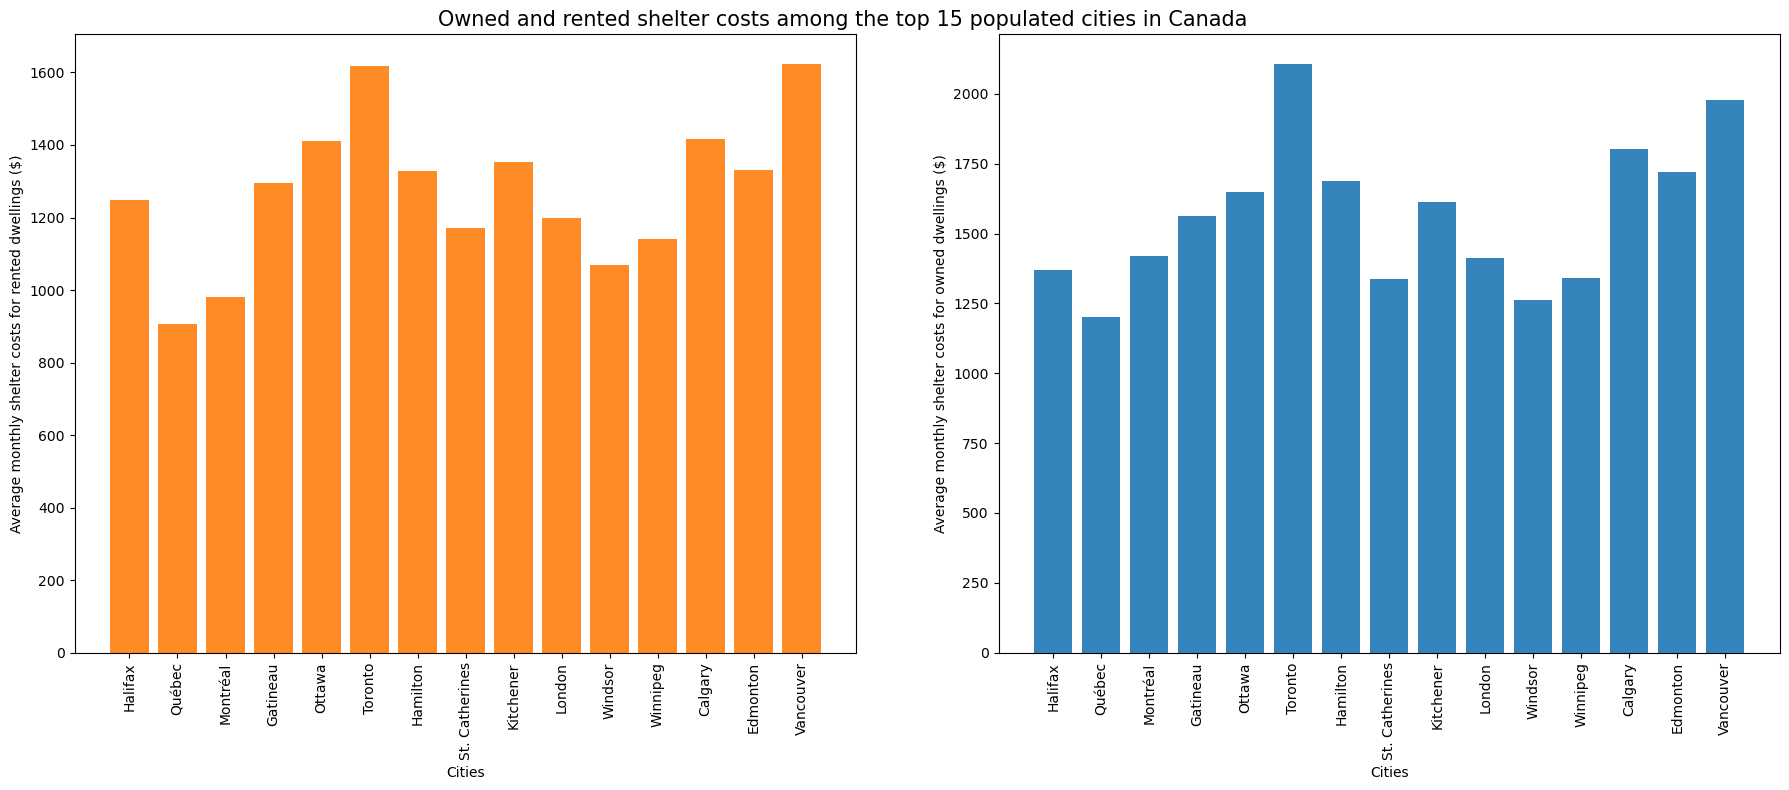

In [513]:
## Creating bar graphs for monthly rented and owned housing costs
fig, axs = plt.subplots(1,2, figsize=(18,8))
axs[0].bar(combined_data['Name'], combined_data['Average monthly shelter costs for rented dwellings ($)'], color = 'C1', alpha = 0.9)
axs[0].set_xlabel('Cities')
axs[0].set_ylabel('Average monthly shelter costs for rented dwellings ($)')
axs[0].tick_params(axis='x', labelrotation = 90)

axs[1].bar(combined_data['Name'], combined_data['Average monthly shelter costs for owned dwellings ($)'], color='C0', alpha = 0.9)
axs[1].set_xlabel('Cities')
axs[1].set_ylabel('Average monthly shelter costs for owned dwellings ($)')
axs[1].tick_params(axis='x', labelrotation = 90)

plt.title('Owned and rented shelter costs among the top 15 populated cities in Canada', x=-0.2, y=1, fontsize = 15)
plt.tight_layout()
plt.savefig('./Visualizations/shelter_bargraph.png')
plt.show()

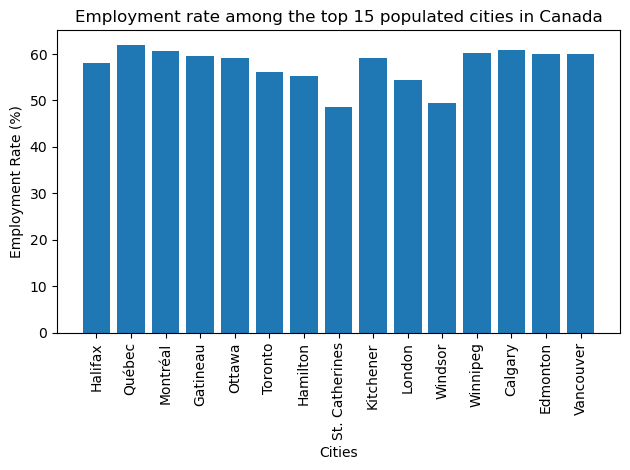

In [511]:
## Creating bar graphs for employment rate
plt.bar(combined_data['Name'], combined_data['Employment Rate (%)'])
plt.xlabel('Cities')
plt.ylabel('Employment Rate (%)')
plt.tick_params(axis='x', labelrotation = 90)
plt.title('Employment rate among the top 15 populated cities in Canada')
plt.tight_layout()
plt.savefig('./Visualizations/employment_bargraph.png')
plt.show()

## T-tests
### Testing whether there is a statistically significant difference between Average monthly shelter costs for rented dwellings and Average monthly shelter costs for owned dwellings across 15 Canadian cities

##### Null hypothesis: There is no difference between Average monthly shelter costs for rented dwellings and Average monthly shelter costs for owned dwellings across the 15 cities 
##### Alternative hypothesis: There is a significant difference between Average monthly shelter costs for rented dwellings and Average monthly shelter costs for owned dwellings across the 15 cities

In [503]:
## Obtaining values for aerage monthly shelter costs for owned and rented dwellings
owned = combined_data['Average monthly shelter costs for owned dwellings ($)']

rented = combined_data['Average monthly shelter costs for rented dwellings ($)']

In [504]:
## Conducting t-test to assess if there is a significant difference in the means of monthly rent and monthly mortgage 
t_test = stats.ttest_ind(owned, rented, equal_var=False)
print(f"t-statistic: {t_test[0]} \np-value: {t_test[1]} \nMean monthly cost for owned dwellings: {owned.mean()} \nMean monthly cost for rented dwellings: {rented.mean()}")

t-statistic: 3.3721373884212453 
p-value: 0.0023129542969375725 
Mean monthly cost for owned dwellings: 1564.3333333333333 
Mean monthly cost for rented dwellings: 1272.5333333333333


### Other visualizations

#### Correlation between employment rate and median income

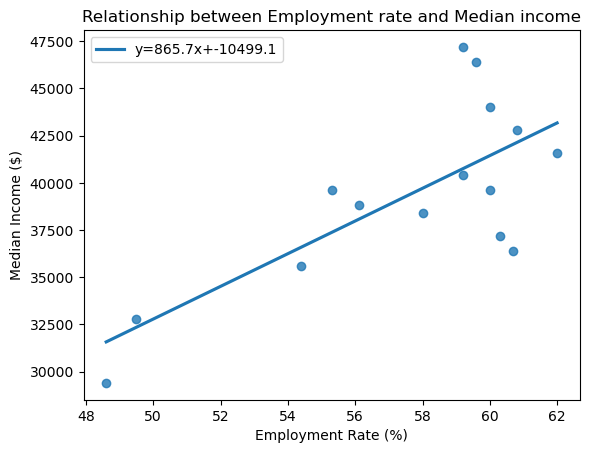

In [507]:
## Creating a scatterplot with linear regression to ascertain the relationship between employment rate and median income
fig, axs = plt.subplots()
slope, intercept, r_value, p_value, std_err = stats.linregress(combined_data['Employment Rate (%)'], combined_data['Median Income'])
sns.regplot(x = combined_data['Employment Rate (%)'], y = combined_data['Median Income'], ax=axs, ci = None, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.legend()
plt.ylabel('Median Income ($)')
plt.title('Relationship between Employment rate and Median income')
plt.savefig("./Visualizations/EmpRate_vs_MedInc.png")

In [506]:
## Finding the r-value and p-value from the correlation
correlation = stats.pearsonr(combined_data['Employment Rate (%)'], y = combined_data['Median Income'])
r_value = round(correlation[0], 2)
p_value = round(correlation[1], 3)
print(f'There is a positive correlation between Employment Rate and Median Income with an r-value of {r_value} and a p-value of {p_value}. The r-value suggests that there is a moderately strong correlation between the two variables and the p-value indicates that the relationship is significant')

There is a positive correlation between Employment Rate and Median Income with an r-value of 0.73 and a p-value of 0.002. The r-value suggests that there is a moderately strong correlation between the two variables and the p-value indicates that the relationship is significant
